In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
257017,1.0,0.061538,1.0,0.538462,0.0,1.0,1.0,0.040453,0.154321,0.688581,0
91774,0.0,0.107692,1.0,0.538462,0.0,0.0,1.0,0.000000,0.956790,0.899654,0
47982,1.0,0.369231,1.0,0.538462,0.0,2.0,1.0,0.054348,0.746914,0.062284,0
64578,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.043776,0.981481,0.499247,0
274327,1.0,0.261538,1.0,0.538462,1.0,1.0,0.0,0.085613,0.154321,0.214533,0


In [6]:
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
36617,1,0.046154,1,0.903846,0,0,1,0.062926,0.932099,0.747405,1
24874,1,0.323077,1,0.538462,1,1,0,0.049405,0.154321,0.847751,0
38366,1,0.061538,1,0.057692,0,0,0,0.046661,0.932099,0.307958,0
36942,0,0.092308,1,0.153846,1,0,0,0.047232,0.932099,0.491349,0
16800,1,0.476923,1,0.903846,0,1,1,0.067287,0.154321,0.003460,0


0    250661
1     35001
Name: Tertarik, dtype: int64


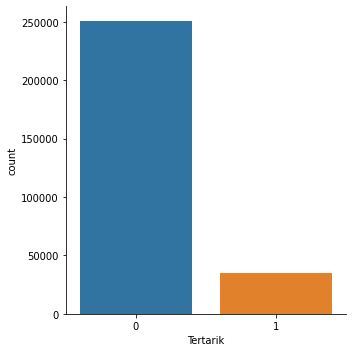

In [7]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [8]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_val.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_val.shape}')


x_train shape: (228529, 10)
x_test shape: (57133, 10)
---------------------------------
y_train shape: (228529,)
y_test shape: (57133,)


## **Tuning Model**

In [10]:
classifier = [
    DecisionTreeClassifier(class_weight='balanced'),
    SGDClassifier(class_weight='balanced'),
    GaussianNB(),
    AdaBoostClassifier(),
    RandomForestClassifier(class_weight='balanced'),
]

name = [
    'Decision Tree',
    'SGDClassifier',
    'Naive Bayes',
    'AdaBoost',
    'Random Forest',
]

### **Melatih Model Machine Learning**

In [11]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)

In [12]:
def report(model, title, x_test, y_test):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    f1 = f1_score(y_test, result)
    recall = recall_score(y_test, result)
    precision = precision_score(y_test, result)
    roc = roc_auc_score(y_test, result)
    accuracy = accuracy_score(y_test, result)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy


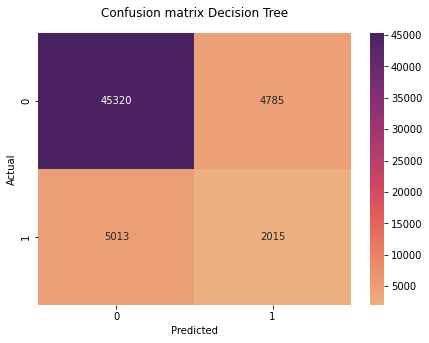

F1-Score 	: 0.29143766271333527
Recall 		: 0.2867103016505407
Precision 	: 0.2963235294117647
ROC-AUC 	: 0.5956054252489805
Accuracy 	: 0.8285054171844644



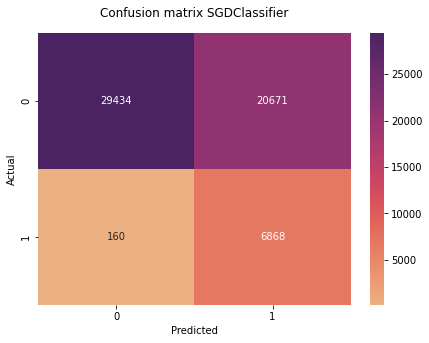

F1-Score 	: 0.3973732172303064
Recall 		: 0.977233921457029
Precision 	: 0.24939177166926904
ROC-AUC 	: 0.782340142047744
Accuracy 	: 0.6353946055694607



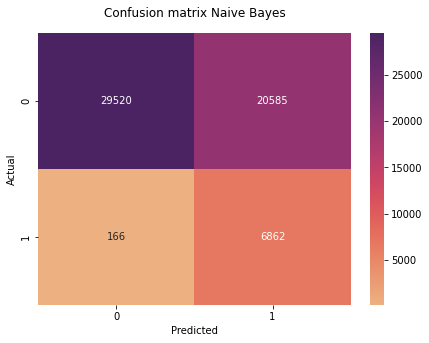

F1-Score 	: 0.3980855692530819
Recall 		: 0.9763801935116676
Precision 	: 0.2500091084635844
ROC-AUC 	: 0.7827714758597155
Accuracy 	: 0.6367948471111267



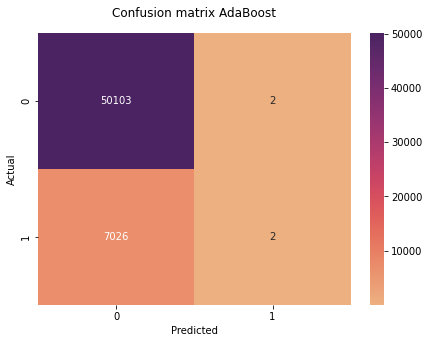

F1-Score 	: 0.0005688282138794085
Recall 		: 0.0002845759817871372
Precision 	: 0.5
ROC-AUC 	: 0.5001223299028783
Accuracy 	: 0.8769887805646474



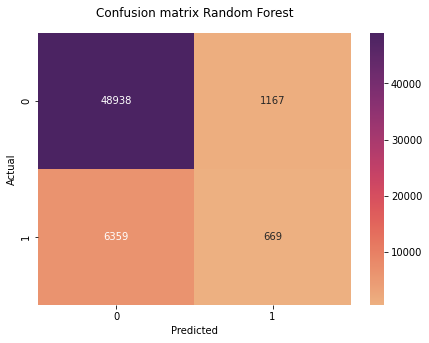

F1-Score 	: 0.15094765342960287
Recall 		: 0.09519066590779739
Precision 	: 0.36437908496732024
ROC-AUC 	: 0.5359497885970481
Accuracy 	: 0.868272276967777



In [13]:
metrics_report = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_val, y_val)
    metrics_report.append([title, f1, recall, precision, roc, accuracy])

In [14]:
metrics_report = pd.DataFrame(metrics_report, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
2,Naive Bayes,0.398086,0.976380,0.250009,0.782771,0.636795
1,SGDClassifier,0.397373,0.977234,0.249392,0.782340,0.635395
0,Decision Tree,0.291438,0.286710,0.296324,0.595605,0.828505
4,Random Forest,0.150948,0.095191,0.364379,0.535950,0.868272
3,AdaBoost,0.000569,0.000285,0.500000,0.500122,0.876989


## **Memprediksi Dan Evaluasi Data Test**

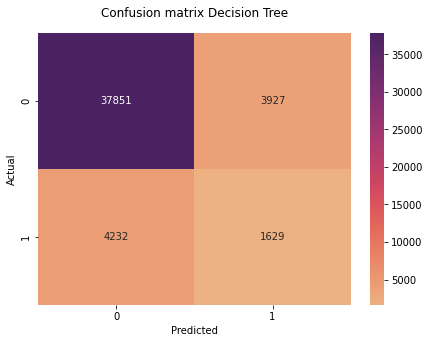

F1-Score 	: 0.28536393098011736
Recall 		: 0.27793891827333217
Precision 	: 0.29319654427645786
ROC-AUC 	: 0.5919710389154972
Accuracy 	: 0.8287327609731523



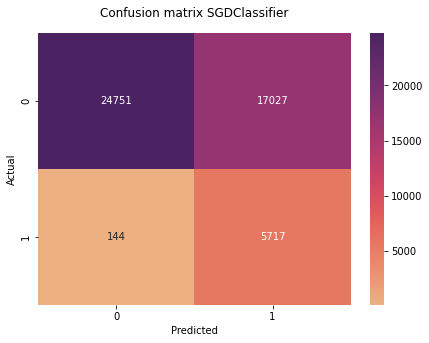

F1-Score 	: 0.39972032861387874
Recall 		: 0.9754308138542911
Precision 	: 0.25136299683432994
ROC-AUC 	: 0.7839359057542793
Accuracy 	: 0.6395600243497974



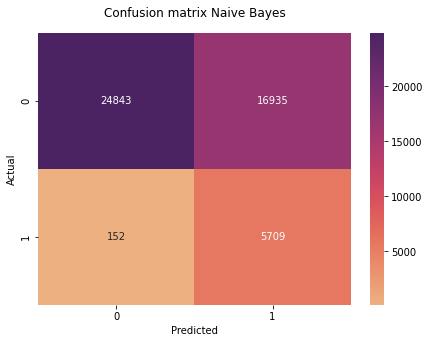

F1-Score 	: 0.4005613050342045
Recall 		: 0.9740658590684184
Precision 	: 0.2521197668256492
ROC-AUC 	: 0.7843544863344389
Accuracy 	: 0.6413232855433574



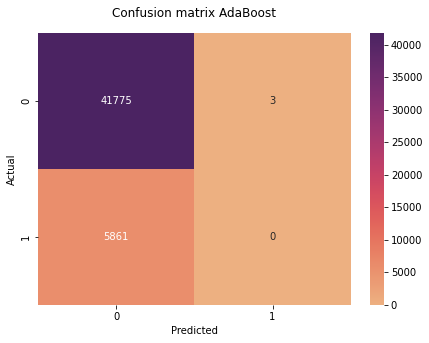

F1-Score 	: 0.0
Recall 		: 0.0
Precision 	: 0.0
ROC-AUC 	: 0.49996409593565994
Accuracy 	: 0.8769075757257709



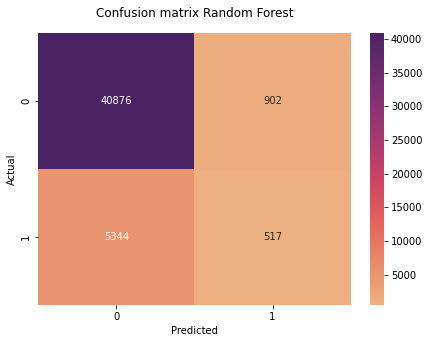

F1-Score 	: 0.14203296703296703
Recall 		: 0.0882102030370244
Precision 	: 0.3643410852713178
ROC-AUC 	: 0.5333099461735938
Accuracy 	: 0.8688889355360104



In [15]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

metrics_report_test = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_test, y_test)
    metrics_report_test.append([title, f1, recall, precision, roc, accuracy])

In [16]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
2,Naive Bayes,0.400561,0.974066,0.252120,0.784354,0.641323
1,SGDClassifier,0.399720,0.975431,0.251363,0.783936,0.639560
0,Decision Tree,0.285364,0.277939,0.293197,0.591971,0.828733
4,Random Forest,0.142033,0.088210,0.364341,0.533310,0.868889
3,AdaBoost,0.000000,0.000000,0.000000,0.499964,0.876908
